In [19]:
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds
from pickleshare import PickleShareDB
import seaborn as sns

db = PickleShareDB('~/.ipython/profile_default/db/autorestore')

#sparse_word_doc_matrix = db['sparse_word_doc_matrix']

sparse_tfidf_matrix = db['sparse_tfidf_matrix']

In [20]:
#U S VT
#U & VT representations of isometric transformations of the space
#S/Σ scaling of each xi by factor σi

#try coherence scores  
#or perplexity scores

#k_max = (min(sparse_word_doc_matrix.shape)-1)
#terms, concepts, documents = svds(sparse_word_doc_matrix, k=k_max)

k_max = (min(sparse_tfidf_matrix.shape)-1)
terms, concepts, documents = svds(sparse_tfidf_matrix, k=k_max)



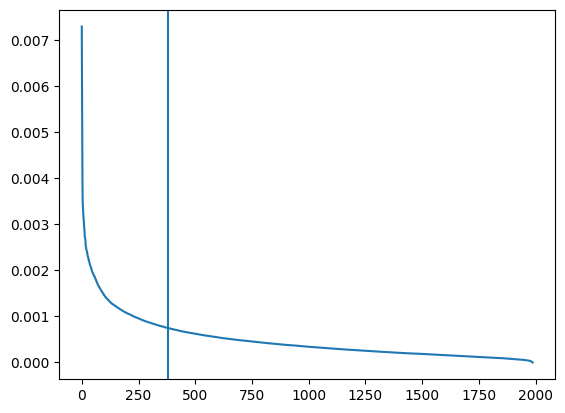

In [21]:

fig = figure()
singular_values = fig.add_subplot(1,1,1)

#the square of each singular value is proportional to the variance explained by each singular vector

concepts_descending = concepts[(-concepts).argsort()]

explained = concepts_descending**2/np.sum(concepts_descending**2)

explained_50 = np.argwhere(np.cumsum(explained) >= np.sum(explained)/2)[0]

singular_values.plot(explained)

singular_values.axvline(x=explained_50)

Stored 'word_vectors_2d' (DataFrame)


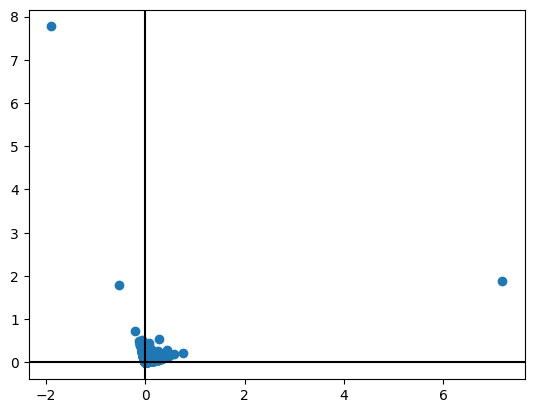

In [24]:
#terms dot diagonal matrix of sigma values
terms_s = terms @ np.diag(concepts)

k_largest =  concepts.size - 1

y = k_largest
x = k_largest - 1

#word space vectors in 2d
terms_s_x_y = terms_s[:,[x,y]]


word_vectors_2d = pd.DataFrame(terms_s_x_y, columns=['x','y'])


fig = figure()
words_plot = fig.add_subplot(1,1,1)

words_plot.scatter(word_vectors_2d['x'],word_vectors_2d['y'])
words_plot.axhline(y=0, color='k')
words_plot.axvline(x=0, color='k')


%store word_vectors_2d